<h2>Data Integration</h2>

<h3>Imports<h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import seaborn as sns
from pathlib import Path
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.sompy import SOMFactory
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


<p>Reading the document<p>

In [2]:
#Open Excel files with different extensions
filename = 'train.csv'
file_path = Path(filename)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    d = pd.read_excel(file_path, engine='openpyxl')
    data = d.copy()
elif file_extension == 'xls':
    d = pd.read_excel(file_path)
    data = d.copy()
elif file_extension == 'csv':
    d = pd.read_csv(file_path, delimiter=";")
    data = d.copy()
else:
    raise Exception("File not supported")


<h2>Data Access, Exploration and Understanding</h2>

In [3]:
data.head()

Cust_ID    Churn                    Name Longevity  Year_Birth TypeTravel  \
0        1    churn       Ms. Nicole Clarke       yes      1974.0   business   
1        2  nochurn         Mr. Jesse Scott       yes      1965.0   business   
2        3    churn  Mr. Christopher Carter       yes      1973.0   business   
3        4  nochurn     Ms. Jennifer Morgan       yes      1993.0    leisure   
4        5  nochurn       Mr. Michael White       yes      1989.0   business   

  RoomType  RewardPoints  Comfort  ReceptionSchedule  ...  Wifi  Amenities  \
0   single          4907        3                  4  ...     4          3   
1   single          6724        1                  1  ...     5          3   
2   single          4365        3                  3  ...     1          4   
3   double          3849        1                  1  ...     4          4   
4   single          5376        2                  2  ...     5          5   

   Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
0      4              3             3          3         3        4   
1      4              5             5          5         5        1   
2      4              3             3          2         3        2   
3      5              4             4          4         4        4   
4      5              5             5          3         4        1   

   Cleanliness  BarService  
0            3           4  
1            5           2  
2            3           1  
3            4           3  
4            3           5  

[5 rows x 22 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

In [5]:
data.shape

(15589, 22)

<h4>Looking for Null Values<h4>

<p> By summing the null values for each attribute and then dividing them by the total of values of the same attribute, we will obtain the percentage of null values that each column has. A value different from 0 means that the column has 1 or more missing values, which is not desired. </p>

In [6]:
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

<h4>Checking for duplicate values</h4>

In [7]:
data.duplicated().sum()

0

<p> We conclude that there are no duplicates in our dataset. Hence, no measures have to be taken into action. </p>

<h4> Finding outliers in Year_Birth </h4>

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'S

findfont: score(<Font 'Tekton Pro' (TektonPro-BoldCond.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal book normal>) = 10.05
findfont: score(<Font 'Nueva Std' (NuevaStd-BoldCond.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Muna' (Muna.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) no

findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Light.otf) normal normal light normal>) = 10.24
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-ExtraLight.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'System Font' (SFNSTextItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Italic.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal regular normal>) = 10.05
findfont: score(<Font 'Raleway' (Raleway-SemiBoldItalic.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Source Sans Pro' (S

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal bold normal>) = 11.335
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal bold normal>) = 10.335
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal regular condensed>) = 10.25
findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Regular.otf) normal normal regular normal>) = 10.05
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal semibold condensed>) = 10.44
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Heavy.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trajan Pro 3' (TrajanPro3-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-BoldItalic.otf) italic normal bold normal>) = 11.335
findfont: score(<Font '.SF NS Display C

findfont: score(<Font 'Source Sans Pro' (SourceSansPro-Black.otf) normal normal black normal>) = 10.525
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal semibold normal>) = 11.24
findfont: score(<Font '.SF Compact Text' (SFCompactText-Semibold.otf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Medium.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal bold normal>) = 10.33

findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Medium.otf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Pro' (MyriadPro-CondIt.otf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Myriad Pro' (MyriadPro-Bold.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Hobo Std' (HoboStd.otf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal no

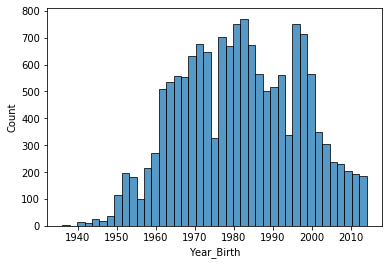

In [8]:
sns.histplot(data=data, x='Year_Birth')

No outliers found.

<h2>Data Preprocessing</h2>

<h4> Power Transformation for Reward Points <h4>

<p>We will now apply a power transformation to make data more Gaussian-like.</p>

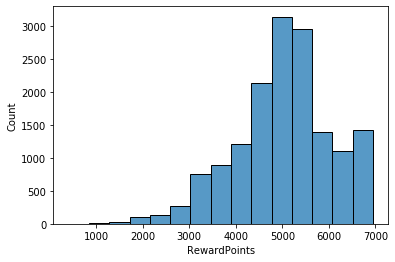

In [9]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

In [10]:
#pt = PowerTransformer(method='yeo-johnson', standardize=True)
#pt.fit(data["RewardPoints"].values.reshape(-1, 1))
#print(pt.lambdas_)
#data['RewardPoints'] = pt.transform(data["RewardPoints"].values.reshape(-1, 1))

In [11]:
#sns.histplot(data=data, x='RewardPoints', bins = 15)

<h4>Using KNN imputer for the missing values in Year_Birth <h4>

In [12]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(data['Year_Birth'].values.reshape(-1, 1))
data['Year_Birth'] = imputer.transform(data['Year_Birth'].values.reshape(-1, 1))



In [13]:
data.isna().sum()

Cust_ID              0
Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<p> As demonstrated above, our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values. </p>

<h4>Transform Year_Birth to age</h4>

We will now transform the variable Year_Birth to age. We will not use this new variable in our models, but it will be useful in order to better undestand the charactheristics of the population we are dealing with.

In [14]:
today = date.today()

age = today.year - data['Year_Birth']
print(age)

0        48.0
1        57.0
2        49.0
3        29.0
4        33.0
         ... 
15584    34.0
15585    22.0
15586    58.0
15587    30.0
15588    39.0
Name: Year_Birth, Length: 15589, dtype: float64


Text(0.5, 0, 'Age')

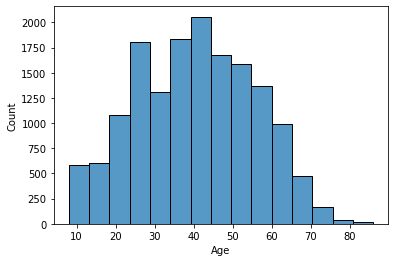

In [15]:
AgePlot = sns.histplot(data=age, x=age, bins = 15)
AgePlot.set_xlabel("Age")

In [16]:
age.mean()

40.293555930882164

We can conclude that the average age of the people in our dataset is around 40 years old. We will now plot the relation between TypeTravel and Year_Birth to check if there are any outliers in that.

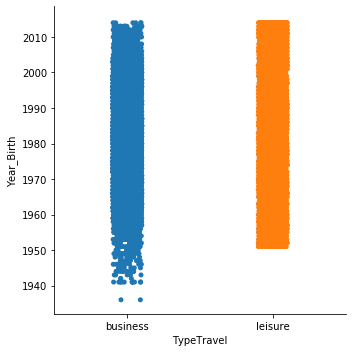

In [17]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

It appears that there are two isolated dots from very old people who are still going on business trips. We will consider these outliers and therefore remove them.

In [18]:
data.drop(data[(data['Year_Birth'] < 1937) & (data['TypeTravel'] == "business")].index, inplace = True)

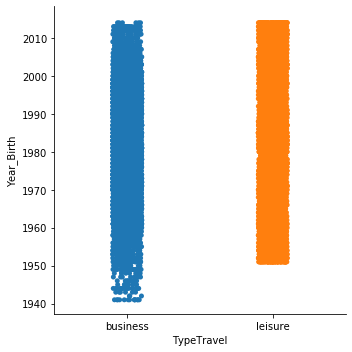

In [19]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

<h3>Transform Name in gender </h3>

Since "Name" is not a useful variable for our models, we will transform it to gender. This new variable gives us much better information.

In [20]:
gender = []
for i in data["Name"]:
    if i[:2] == "Mr":
        gender.append(1)
    else:
        gender.append(0)
        i
data["Name"] = gender
data = data.rename(columns = {"Name":"Male"})


<h4>Change Data types</h4>

Replacing the data from longevity to 1 and 0
Yes=1 No=0

In [21]:
data['Longevity'].value_counts()

yes    12546
no      2874
y        167
Name: Longevity, dtype: int64

In [22]:
data['Longevity'].replace(to_replace = 'yes',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'y',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'no',value = 0, inplace = True)
data['Longevity'].value_counts()

1    12713
0     2874
Name: Longevity, dtype: int64

<h4>Changing the Values of Column "TypeTravel"</h4>

<p>business = 1 leisure = 0 </p>

In [23]:
data['TypeTravel'].value_counts()

business    10754
leisure      4833
Name: TypeTravel, dtype: int64

In [24]:
data['TypeTravel'].replace(to_replace = 'business',value = 1, inplace = True)
data['TypeTravel'].replace(to_replace = 'leisure',value = 0, inplace = True)
data['TypeTravel'].value_counts()

1    10754
0     4833
Name: TypeTravel, dtype: int64

<h4>Changing the Values of Column "Wifi"</h4>

<p>6 were Replaced by 5 </p>

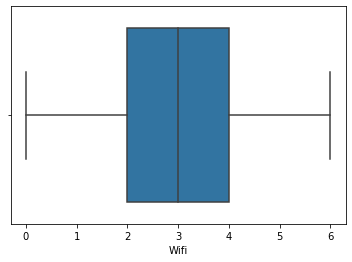

In [25]:
sns.boxplot(x="Wifi", data = data[['Wifi']])

Since the data range goes from 0 to 5, it doesn't make sense to have Wifi evaluated as a 6.

In [26]:
data['Wifi'].value_counts()

4    3704
5    3446
3    3346
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [27]:
data['Wifi'].replace(to_replace = 6,value = 5, inplace = True)
data['Wifi'].value_counts()

4    3704
5    3482
3    3346
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [28]:
data['Wifi'].max()

5

Now Wifi is evaluated from 0 to 5, like all the other variables.

<h4>Changing the Values of Column "Churn"</h4>

<p>convert "churn" and "nochurn" to 1 (True) and 0 (False) </p>

In [29]:
data['Churn'].value_counts()

nochurn    8477
churn      7110
Name: Churn, dtype: int64

In [30]:
data['Churn'].replace(to_replace = 'churn',value = 1, inplace = True)
data['Churn'].replace(to_replace = 'nochurn',value = 0, inplace = True)
data['Churn'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15587 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15587 non-null  int64  
 1   Churn              15587 non-null  int64  
 2   Male               15587 non-null  int64  
 3   Longevity          15587 non-null  int64  
 4   Year_Birth         15587 non-null  float64
 5   TypeTravel         15587 non-null  int64  
 6   RoomType           15587 non-null  object 
 7   RewardPoints       15587 non-null  int64  
 8   Comfort            15587 non-null  int64  
 9   ReceptionSchedule  15587 non-null  int64  
 10  FoodDrink          15587 non-null  int64  
 11  Location           15587 non-null  int64  
 12  Wifi               15587 non-null  int64  
 13  Amenities          15587 non-null  int64  
 14  Staff              15587 non-null  int64  
 15  OnlineBooking      15587 non-null  int64  
 16  PriceQuality       155

Changing the type of Year_Birth to int32

<p>After applying the power transformation to Year_Birth, some years became non-integer values. Since this does not make sense, we changed the type of this variable to int in order to round those values. </p>

In [31]:
data['Year_Birth']=data['Year_Birth'].astype(int)
data.head(4)

Cust_ID  Churn  Male  Longevity  Year_Birth  TypeTravel RoomType  \
0        1      1     0          1        1974           1   single   
1        2      0     1          1        1965           1   single   
2        3      1     1          1        1973           1   single   
3        4      0     0          1        1993           0   double   

   RewardPoints  Comfort  ReceptionSchedule  ...  Wifi  Amenities  Staff  \
0          4907        3                  4  ...     4          3      4   
1          6724        1                  1  ...     5          3      4   
2          4365        3                  3  ...     1          4      4   
3          3849        1                  1  ...     4          4      5   

   OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
0              3             3          3         3        4            3   
1              5             5          5         5        1            5   
2              3             3          2         3        2            3   
3              4             4          4         4        4            4   

   BarService  
0           4  
1           2  
2           1  
3           3  

[4 rows x 22 columns]

<h4>Room Type change</h4>

In [32]:
data['RoomType'].value_counts()

single    7440
double    7021
suite     1126
Name: RoomType, dtype: int64

<h4>Ordinal Encoding for column RoomType</h4>

In [33]:
data['RoomType'].replace(to_replace = 'suite',value = 2, inplace = True)
data['RoomType'].replace(to_replace = 'double',value = 1, inplace = True)
data['RoomType'].replace(to_replace = 'single',value = 0, inplace = True)
data['RoomType'].value_counts()

0    7440
1    7021
2    1126
Name: RoomType, dtype: int64

<h4>Pearson Correlation Heatmap</h4>

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fccbdfaa150>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fccbdfaa150>
Setting pcolormesh


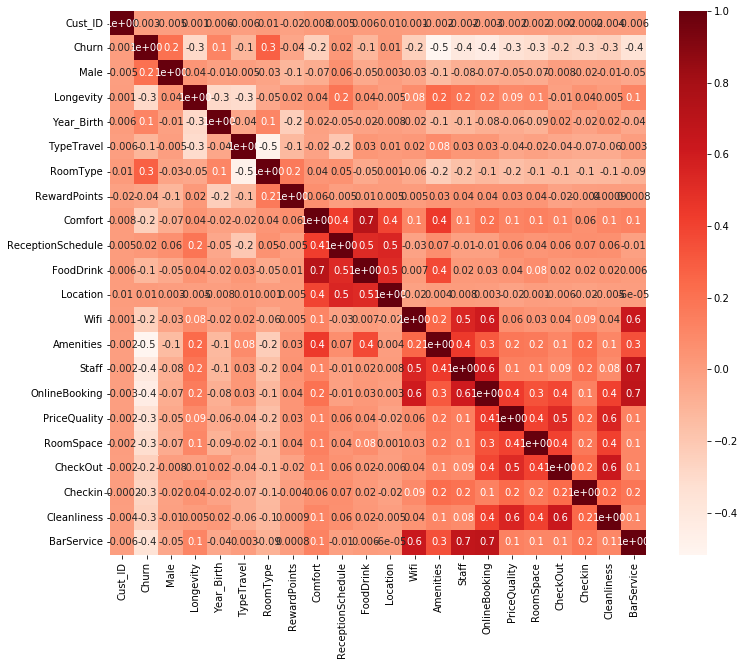

In [34]:
#Pearson correlation
cor_pearson= data.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

<h4>Feature Selection</h4>

<p>With the correlation map we were able see which features had a greater correlation between them. </p>

In [35]:
unscaled_data = data.copy()

In [36]:
data.drop(columns=['Cust_ID'], inplace=True)

<h4>Scaling<h4>

<p>Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.</p>

In [37]:
scaler = RobustScaler().fit(data)
robust_data = scaler.transform(data)

data = pd.DataFrame(robust_data, columns = data.columns)
data.head()

Churn  Male  Longevity  Year_Birth  TypeTravel  RoomType  RewardPoints  \
0    1.0   0.0        0.0   -0.291667         0.0      -1.0     -0.150457   
1    0.0   1.0        0.0   -0.666667         0.0      -1.0      1.359933   
2    1.0   1.0        0.0   -0.333333         0.0      -1.0     -0.600998   
3    0.0   0.0        0.0    0.500000        -1.0       0.0     -1.029925   
4    0.0   1.0        0.0    0.333333         0.0      -1.0      0.239401   

   Comfort  ReceptionSchedule  FoodDrink  ...  Wifi  Amenities  Staff  \
0      0.0                0.5       -1.0  ...   0.5       -0.5    0.0   
1     -1.0               -1.0       -1.0  ...   1.0       -0.5    0.0   
2      0.0                0.0        0.0  ...  -1.0        0.0    0.0   
3     -1.0               -1.0       -1.0  ...   0.5        0.0    0.5   
4     -0.5               -0.5        0.0  ...   1.0        0.5    0.5   

   OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
0      -0.333333          -1.0  -0.333333      -0.5      1.0         -0.5   
1       0.333333           1.0   0.333333       0.5     -2.0          0.5   
2      -0.333333          -1.0  -0.666667      -0.5     -1.0         -0.5   
3       0.000000           0.0   0.000000       0.0      1.0          0.0   
4       0.333333           1.0  -0.333333       0.0     -2.0         -0.5   

   BarService  
0         0.5  
1        -0.5  
2        -1.0  
3         0.0  
4         1.0  

[5 rows x 21 columns]

<h4>PCA</h4>

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

In [38]:
#pca = PCA().fit(data)
#data_PCA = pca.transform(data)

#data = pd.DataFrame(data_PCA, columns = data.columns)
#data.head()

We ended up not using PCA because we felt that the trade-off between more simplicity but less accuracy was not worth it. The data is simple enough to the point where we ca analyse it without the need for dimensionality reduction. 

<h4> Perspectives </h4>

In [39]:
data_satisfaction = data[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
data_satisfaction

Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  Amenities  \
0          0.0                0.5       -1.0       0.5   0.5       -0.5   
1         -1.0               -1.0       -1.0      -1.0   1.0       -0.5   
2          0.0                0.0        0.0       0.0  -1.0        0.0   
3         -1.0               -1.0       -1.0      -1.0   0.5        0.0   
4         -0.5               -0.5        0.0      -0.5   1.0        0.5   
...        ...                ...        ...       ...   ...        ...   
15582     -0.5               -1.5       -0.5      -0.5   0.0       -1.0   
15583      0.0                0.0        0.0       0.0   1.0       -0.5   
15584     -1.0               -1.0       -1.0      -1.0   0.0        0.0   
15585      0.5                0.0        0.5       0.5   1.0        0.0   
15586      0.0                0.0        0.0       0.0   0.0       -0.5   

       Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
0        0.0      -0.333333          -1.0  -0.333333      -0.5      1.0   
1        0.0       0.333333           1.0   0.333333       0.5     -2.0   
2        0.0      -0.333333          -1.0  -0.666667      -0.5     -1.0   
3        0.5       0.000000           0.0   0.000000       0.0      1.0   
4        0.5       0.333333           1.0  -0.333333       0.0     -2.0   
...      ...            ...           ...        ...       ...      ...   
15582    0.0      -0.333333           0.0   0.333333      -1.5      0.0   
15583    0.5       0.333333          -1.0  -1.000000      -0.5      1.0   
15584    0.5       0.000000           0.0   0.000000       0.0      2.0   
15585    0.5       0.333333          -2.0   0.333333       0.0      0.0   
15586   -0.5      -0.333333           0.0   0.333333       0.0     -2.0   

       Cleanliness  BarService  
0             -0.5         0.5  
1              0.5        -0.5  
2             -0.5        -1.0  
3              0.0         0.0  
4             -0.5         1.0  
...            ...         ...  
15582          0.0         0.0  
15583          0.0         1.0  
15584          0.0         0.5  
15585          0.0         1.0  
15586         -0.5         0.0  

[15587 rows x 14 columns]

In [40]:
data_customer = data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].copy()
data_customer

Male  Longevity  Year_Birth  TypeTravel  RewardPoints  RoomType  Churn
0       0.0        0.0   -0.291667         0.0     -0.150457      -1.0    1.0
1       1.0        0.0   -0.666667         0.0      1.359933      -1.0    0.0
2       1.0        0.0   -0.333333         0.0     -0.600998      -1.0    1.0
3       0.0        0.0    0.500000        -1.0     -1.029925       0.0    0.0
4       1.0        0.0    0.333333         0.0      0.239401      -1.0    0.0
...     ...        ...         ...         ...           ...       ...    ...
15582   0.0       -1.0    0.291667         0.0     -0.099751       0.0    1.0
15583   0.0       -1.0    0.791667         0.0     -0.098088       0.0    1.0
15584   1.0        0.0   -0.708333         0.0     -0.866168      -1.0    0.0
15585   1.0        0.0    0.458333        -1.0      0.055694       0.0    0.0
15586   1.0        0.0    0.083333         0.0      0.039900       1.0    1.0

[15587 rows x 7 columns]

<h3>Modelling</h3>

<h4>K-Means</h4>

<h4> Elbow Method for satisfaction perspective</h4>

In [41]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_satisfaction)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

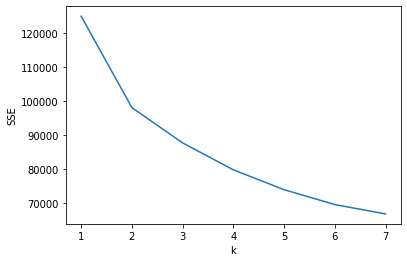

In [42]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

<h4> Elbow Method for customer perspective</h4>

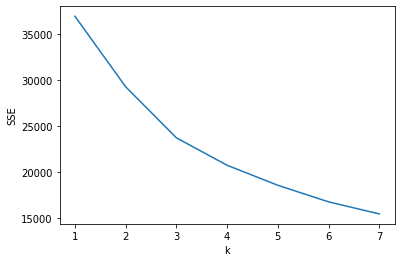

In [43]:
ks = range(1, 8)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)

    
    model.fit(data_customer)

    
    inertias.append(model.inertia_)


plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

<h4>Dendogram for customer perspective</h4>

In [44]:
#hclustering = linkage(data_customer, 'complete') 
#hclustering = linkage(data_customer, 'average')
#hclustering = linkage(data_customer, 'single')
hclustering = linkage(data_customer, 'ward')

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'S

findfont: score(<Font 'Tekton Pro' (TektonPro-BoldCond.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal book normal>) = 10.05
findfont: score(<Font 'Nueva Std' (NuevaStd-BoldCond.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Muna' (Muna.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) no

findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Light.otf) normal normal light normal>) = 10.24
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-ExtraLight.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'System Font' (SFNSTextItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Italic.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal regular normal>) = 10.05
findfont: score(<Font 'Raleway' (Raleway-SemiBoldItalic.ttf) italic normal semibold normal>) = 11.24
findfont: score(<Font 'Source Sans Pro' (S

findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal bold normal>) = 11.335
findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal bold normal>) = 10.335
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal regular condensed>) = 10.25
findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Regular.otf) normal normal regular normal>) = 10.05
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal semibold condensed>) = 10.44
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Heavy.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Trajan Pro 3' (TrajanPro3-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-BoldItalic.otf) italic normal bold normal>) = 11.335
findfont: score(<Font '.SF NS Display C

findfont: score(<Font 'Source Sans Pro' (SourceSansPro-Black.otf) normal normal black normal>) = 10.525
findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal semibold normal>) = 11.24
findfont: score(<Font '.SF Compact Text' (SFCompactText-Semibold.otf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Medium.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal bold normal>) = 10.33

findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Medium.otf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Pro' (MyriadPro-CondIt.otf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Myriad Pro' (MyriadPro-Bold.otf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Hobo Std' (HoboStd.otf) normal normal medium normal>) = 10.145
findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal no

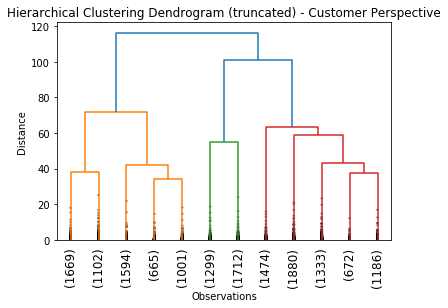

In [45]:
#define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated) - Customer Perspective')
#define the label for x axis
plt.xlabel('Observations')
#define the label for y axis
plt.ylabel('Distance')

#Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4>Dendogram for satisfaction perspective</h4>

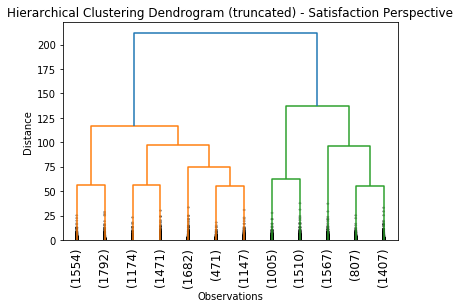

In [46]:
hclustering = linkage(data_satisfaction, 'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated) - Satisfaction Perspective')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4> Applying K-Means </h4>

In [47]:
model_KMeans_satisfaction = KMeans(n_clusters=2)

model_KMeans_satisfaction.fit(data_satisfaction)

KMeans(n_clusters=2)

In [48]:
model_KMeans_customer = KMeans(n_clusters=4)

model_KMeans_customer.fit(data_customer)

KMeans(n_clusters=4)

In [49]:
model_KMeans_satisfaction.cluster_centers_

array([[ 0.03167641,  0.07629413, -0.01635261, -0.00286983,  0.23283517,
        -0.12643491, -0.07483214, -0.01721897,  0.19525666, -0.03858927,
         0.10044401,  0.91498809,  0.10055231,  0.33641975],
       [-0.24035889, -0.11419802, -0.16685031, -0.01290729, -0.04053203,
        -0.58311034, -0.49669448, -0.42132326, -1.60916103, -0.37667244,
        -0.5132221 , -0.52683771, -0.52329608, -0.06280497]])

In [50]:
model_KMeans_customer.cluster_centers_

array([[ 0.51594747, -0.03618333, -0.0181475 , -0.02921469, -1.05778883,
        -0.94157062,  0.24979898],
       [ 0.61232604, -0.00242987,  0.24967786, -0.80119284, -0.10512229,
         0.1608129 ,  0.63110228],
       [ 0.4414446 , -0.93653576,  0.46742052, -0.00280505, -0.03355042,
        -0.33976157,  0.78856942],
       [ 0.36765691, -0.01273174, -0.43305599, -0.24324324,  0.82080444,
        -0.57181148,  0.23944606]])

In [51]:
data_satisfaction['label'] = model_KMeans_satisfaction.labels_
data_satisfaction

Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  Amenities  \
0          0.0                0.5       -1.0       0.5   0.5       -0.5   
1         -1.0               -1.0       -1.0      -1.0   1.0       -0.5   
2          0.0                0.0        0.0       0.0  -1.0        0.0   
3         -1.0               -1.0       -1.0      -1.0   0.5        0.0   
4         -0.5               -0.5        0.0      -0.5   1.0        0.5   
...        ...                ...        ...       ...   ...        ...   
15582     -0.5               -1.5       -0.5      -0.5   0.0       -1.0   
15583      0.0                0.0        0.0       0.0   1.0       -0.5   
15584     -1.0               -1.0       -1.0      -1.0   0.0        0.0   
15585      0.5                0.0        0.5       0.5   1.0        0.0   
15586      0.0                0.0        0.0       0.0   0.0       -0.5   

       Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
0        0.0      -0.333333          -1.0  -0.333333      -0.5      1.0   
1        0.0       0.333333           1.0   0.333333       0.5     -2.0   
2        0.0      -0.333333          -1.0  -0.666667      -0.5     -1.0   
3        0.5       0.000000           0.0   0.000000       0.0      1.0   
4        0.5       0.333333           1.0  -0.333333       0.0     -2.0   
...      ...            ...           ...        ...       ...      ...   
15582    0.0      -0.333333           0.0   0.333333      -1.5      0.0   
15583    0.5       0.333333          -1.0  -1.000000      -0.5      1.0   
15584    0.5       0.000000           0.0   0.000000       0.0      2.0   
15585    0.5       0.333333          -2.0   0.333333       0.0      0.0   
15586   -0.5      -0.333333           0.0   0.333333       0.0     -2.0   

       Cleanliness  BarService  label  
0             -0.5         0.5      0  
1              0.5        -0.5      0  
2             -0.5        -1.0      1  
3              0.0         0.0      0  
4             -0.5         1.0      0  
...            ...         ...    ...  
15582          0.0         0.0      1  
15583          0.0         1.0      0  
15584          0.0         0.5      0  
15585          0.0         1.0      1  
15586         -0.5         0.0      1  

[15587 rows x 15 columns]

In [52]:
data_customer['label'] = model_KMeans_customer.labels_
data_customer

Male  Longevity  Year_Birth  TypeTravel  RewardPoints  RoomType  Churn  \
0       0.0        0.0   -0.291667         0.0     -0.150457      -1.0    1.0   
1       1.0        0.0   -0.666667         0.0      1.359933      -1.0    0.0   
2       1.0        0.0   -0.333333         0.0     -0.600998      -1.0    1.0   
3       0.0        0.0    0.500000        -1.0     -1.029925       0.0    0.0   
4       1.0        0.0    0.333333         0.0      0.239401      -1.0    0.0   
...     ...        ...         ...         ...           ...       ...    ...   
15582   0.0       -1.0    0.291667         0.0     -0.099751       0.0    1.0   
15583   0.0       -1.0    0.791667         0.0     -0.098088       0.0    1.0   
15584   1.0        0.0   -0.708333         0.0     -0.866168      -1.0    0.0   
15585   1.0        0.0    0.458333        -1.0      0.055694       0.0    0.0   
15586   1.0        0.0    0.083333         0.0      0.039900       1.0    1.0   

       label  
0          0  
1          3  
2          0  
3          1  
4          3  
...      ...  
15582      2  
15583      2  
15584      0  
15585      1  
15586      1  

[15587 rows x 8 columns]

<h2> Assessment </h2>

In [53]:
descr_satisfaction = data_satisfaction.groupby(['label']).describe().transpose()
descr_satisfaction

label                       0            1
Comfort    count  9236.000000  6351.000000
           mean      0.031724    -0.240513
           std       0.706854     0.642506
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.000000    -1.500000
           25%       0.000000    -0.500000
           50%       0.500000     0.000000
           75%       1.000000     0.500000
           max       1.000000     1.000000

[112 rows x 2 columns]

In [54]:
descr_customer = data_customer.groupby(['label']).describe().transpose()
descr_customer

label                         0            1            2            3
Male         count  3727.000000  4530.000000  2854.000000  4476.000000
             mean      0.515696     0.612141     0.441486     0.367962
             std       0.499821     0.487316     0.496651     0.482305
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       1.000000     1.000000     0.000000     0.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  3727.000000  4530.000000  2854.000000  4476.000000
             mean     -0.036222    -0.002428    -0.936230    -0.012511
             std       0.186868     0.049223     0.244386     0.111164
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000    -1.000000     0.000000
             50%       0.000000     0.000000    -1.000000     0.000000
             75%       0.000000     0.000000    -1.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
Year_Birth   count  3727.000000  4530.000000  2854.000000  4476.000000
             mean     -0.018122     0.249310     0.466743    -0.432762
             std       0.531713     0.682226     0.414747     0.414454
             min      -1.666667    -1.333333    -1.416667    -1.666667
             25%      -0.416667    -0.208333     0.166667    -0.708333
             50%      -0.041667     0.291667     0.583333    -0.416667
             75%       0.416667     0.791667     0.750000    -0.125000
             max       1.375000     1.375000     1.375000     0.916667
TypeTravel   count  3727.000000  4530.000000  2854.000000  4476.000000
             mean     -0.029246    -0.801104    -0.002803    -0.242851
             std       0.168518     0.399214     0.052879     0.428854
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000    -1.000000     0.000000     0.000000
             50%       0.000000    -1.000000     0.000000     0.000000
             75%       0.000000    -1.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
RewardPoints count  3727.000000  4530.000000  2854.000000  4476.000000
             mean     -1.058913    -0.104556    -0.033436     0.820417
             std       0.657329     0.484462     0.409976     0.477694
             min      -3.889443    -2.071488    -1.807149    -0.363259
             25%      -1.493350    -0.381338    -0.275145     0.370532
             50%      -1.009975    -0.048628    -0.006234     0.906899
             75%      -0.534913     0.229426     0.241687     1.241064
             max       0.160432     1.546966     0.965087     1.547797
RoomType     count  3727.000000  4530.000000  2854.000000  4476.000000
             mean     -0.941508     0.161148    -0.339874    -0.573056
             std       0.238109     0.428701     0.549774     0.567088
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000    -1.000000    -1.000000
             50%      -1.000000     0.000000     0.000000    -1.000000
             75%      -1.000000     0.000000     0.000000     0.000000
             max       1.000000     1.000000     1.000000     1.000000
Churn        count  3727.000000  4530.000000  2854.000000  4476.000000
             mean      0.249799     0.630684     0.788718     0.239276
             std       0.432955     0.482673     0.408290     0.426689
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     1.000000     0.000000
             50%       0.000000     1.000000     1.000000     0.000000
             75%       0.000000     1.000000     1.000000     0.000000
             max       1

<h3>Visualizing the results </h3>

In [55]:
cluster0_satisfaction = data_satisfaction[data_satisfaction.label==0]
cluster1_satisfaction = data_satisfaction[data_satisfaction.label==1]

In [56]:
cluster0_customer = data_customer[data_customer.label==0]
cluster1_customer = data_customer[data_customer.label==1]
cluster2_customer = data_customer[data_customer.label==2]
cluster3_customer = data_customer[data_customer.label==3]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


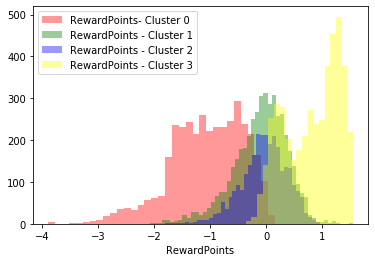

In [57]:
sns.distplot(cluster0_customer['RewardPoints'],color='red',label='RewardPoints- Cluster 0', kde = False)
sns.distplot(cluster1_customer['RewardPoints'],color='green',label='RewardPoints - Cluster 1', kde = False)
sns.distplot(cluster2_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 2', kde = False)
sns.distplot(cluster3_customer['RewardPoints'],color='yellow',label='RewardPoints - Cluster 3', kde = False)
plt.legend()

<h2>SOM Data Satisfaction</h2>

In [58]:
df_som = np.float32(data_satisfaction.values)

In [59]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [60]:
som = SOMFactory().build(df_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [61]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/umatrix.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


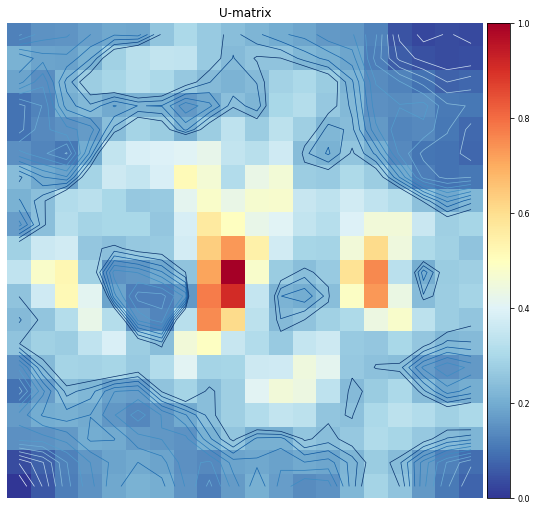

In [62]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)


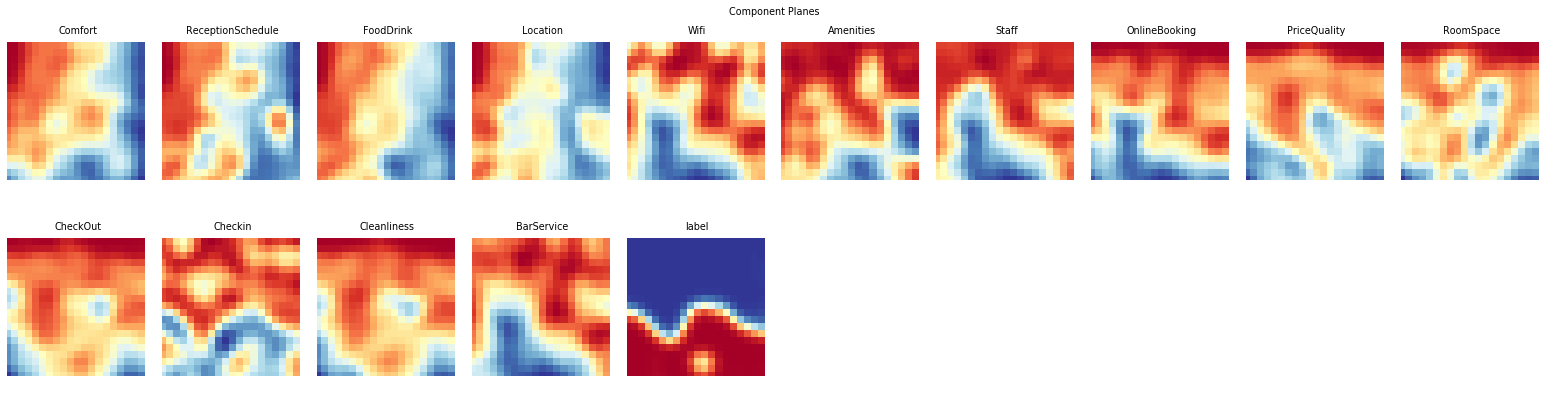

In [63]:
som.component_names = data_satisfaction.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [64]:
bmus = som.project_data(df_som)
bmus

array([215,  59, 364, ..., 139, 211, 288])

In [65]:
cl = som.cluster(n_clusters=2)

In [66]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


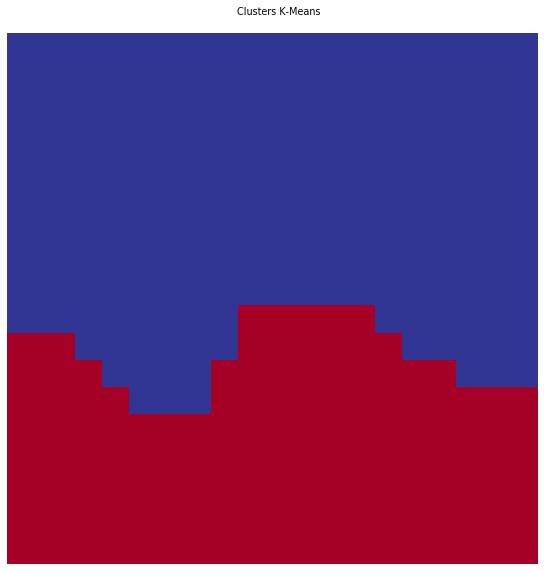

In [67]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


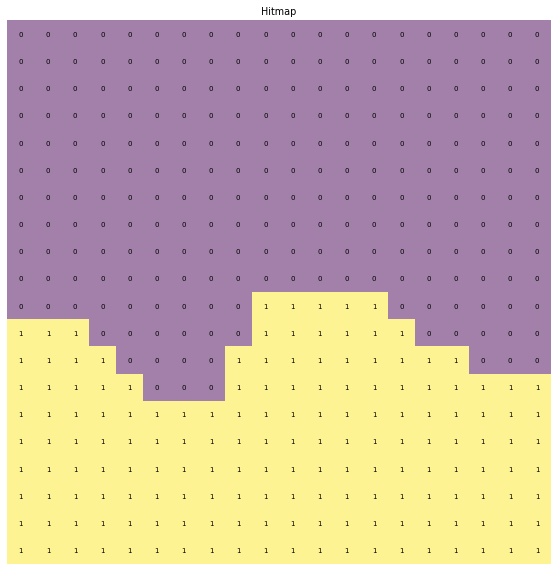

In [68]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [69]:
bmus = som.project_data(df_som)
data_satisfaction['bmu'] = bmus

In [70]:
data_satisfaction['label'] = labels[data_satisfaction['bmu']]
data_satisfaction.head()

Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  Amenities  Staff  \
0      0.0                0.5       -1.0       0.5   0.5       -0.5    0.0   
1     -1.0               -1.0       -1.0      -1.0   1.0       -0.5    0.0   
2      0.0                0.0        0.0       0.0  -1.0        0.0    0.0   
3     -1.0               -1.0       -1.0      -1.0   0.5        0.0    0.5   
4     -0.5               -0.5        0.0      -0.5   1.0        0.5    0.5   

   OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
0      -0.333333          -1.0  -0.333333      -0.5      1.0         -0.5   
1       0.333333           1.0   0.333333       0.5     -2.0          0.5   
2      -0.333333          -1.0  -0.666667      -0.5     -1.0         -0.5   
3       0.000000           0.0   0.000000       0.0      1.0          0.0   
4       0.333333           1.0  -0.333333       0.0     -2.0         -0.5   

   BarService  label  bmu  
0         0.5      0  215  
1        -0.5      0   59  
2        -1.0      1  364  
3         0.0      0  119  
4         1.0      0   75

In [71]:
df_final = data.copy(deep=True)
df_final['label'] = data_satisfaction['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9157.000000  6430.000000
           mean      0.044501    -0.255365
           std       0.701611     0.644163
           min      -1.500000    -1.500000
           25%      -0.500000    -0.500000
...                       ...          ...
BarService min      -1.000000    -1.500000
           25%       0.000000    -0.500000
           50%       0.500000     0.000000
           75%       1.000000     0.500000
           max       1.000000     1.000000

[112 rows x 2 columns]

<h2>SOM Data customer</h2>

In [72]:
df_som_customer = np.float32(data_customer.values)

In [73]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [74]:
som = SOMFactory().build(df_som_customer, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [75]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/umatrix.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


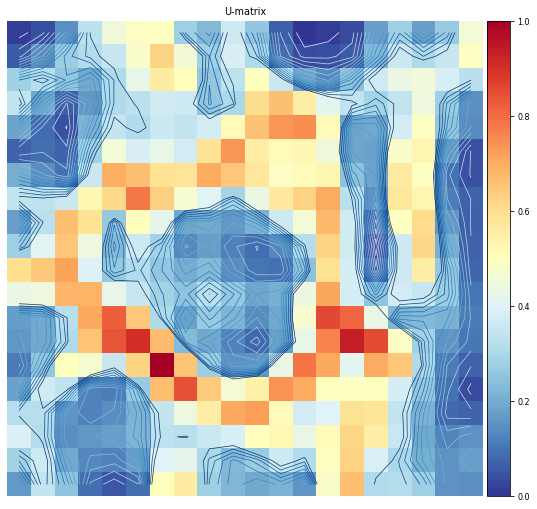

In [76]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

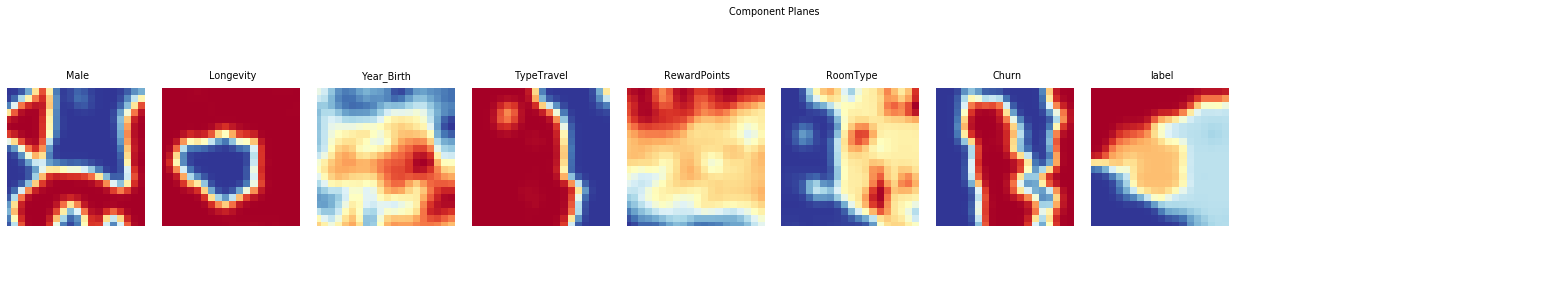

In [77]:
som.component_names = data_customer.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [78]:
bmus = som.project_data(df_som_customer)
bmus

array([349,  43, 347, ..., 322, 316, 333])

In [79]:
cl = som.cluster(n_clusters=4)

In [80]:
labels = getattr(som, 'cluster_labels')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1,

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


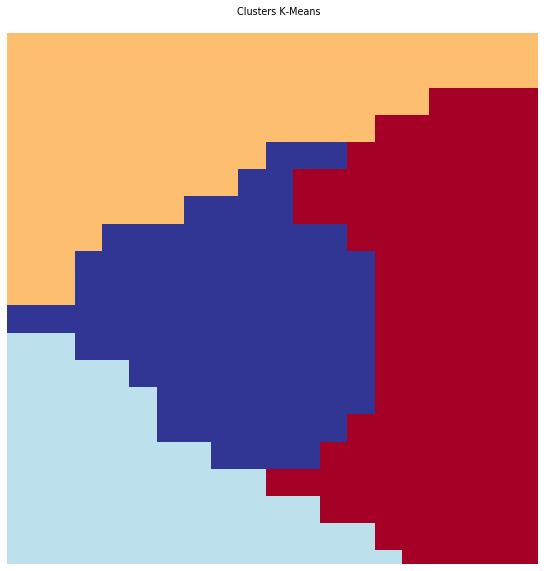

In [81]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


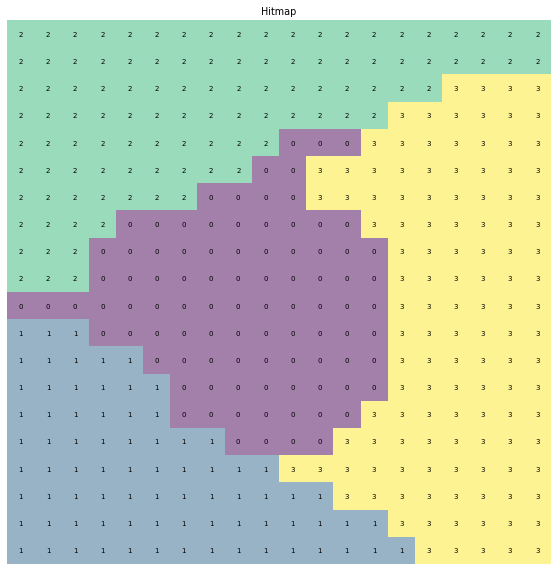

In [82]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [83]:
bmus = som.project_data(df_som_customer)
data_customer['bmu'] = bmus

In [84]:
data_customer['label'] = labels[data_customer['bmu']]
data_customer.head()

Male  Longevity  Year_Birth  TypeTravel  RewardPoints  RoomType  Churn  \
0   0.0        0.0   -0.291667         0.0     -0.150457      -1.0    1.0   
1   1.0        0.0   -0.666667         0.0      1.359933      -1.0    0.0   
2   1.0        0.0   -0.333333         0.0     -0.600998      -1.0    1.0   
3   0.0        0.0    0.500000        -1.0     -1.029925       0.0    0.0   
4   1.0        0.0    0.333333         0.0      0.239401      -1.0    0.0   

   label  bmu  
0      1  349  
1      2   43  
2      1  347  
3      3  395  
4      2  142

In [85]:
df_final = data.copy(deep=True)
df_final['label'] = data_customer['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].describe().T
descr

label                         0            1            2            3
Male         count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.422419     0.526810     0.374501     0.616255
             std       0.494026     0.499350     0.484047     0.486352
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       0.000000     1.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  3042.000000  3618.000000  4510.000000  4417.000000
             mean     -0.927350    -0.011609    -0.001996    -0.000453
             std       0.259603     0.107131     0.044632     0.021277
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%      -1.000000     0.000000     0.000000     0.000000
             50%      -1.000000     0.000000     0.000000     0.000000
             75%      -1.000000     0.000000     0.000000     0.000000
             max       0.000000     0.000000     0.000000     0.000000
Year_Birth   count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.419050    -0.017183    -0.414117     0.251745
             std       0.453582     0.521785     0.426767     0.696678
             min      -1.666667    -1.666667    -1.666667    -1.333333
             25%       0.125000    -0.416667    -0.708333    -0.250000
             50%       0.541667    -0.041667    -0.416667     0.291667
             75%       0.708333     0.416667    -0.125000     0.833333
             max       1.375000     1.375000     1.333333     1.375000
TypeTravel   count  3042.000000  3618.000000  4510.000000  4417.000000
             mean     -0.006246    -0.002211    -0.244568    -0.838352
             std       0.078797     0.046978     0.429878     0.368169
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%       0.000000     0.000000     0.000000    -1.000000
             50%       0.000000     0.000000     0.000000    -1.000000
             75%       0.000000     0.000000     0.000000    -1.000000
             max       0.000000     0.000000     0.000000     0.000000
RewardPoints count  3042.000000  3618.000000  4510.000000  4417.000000
             mean     -0.072270    -1.012914     0.817048    -0.145746
             std       0.461060     0.673448     0.480005     0.534129
             min      -2.156276    -3.889443    -0.363259    -3.788861
             25%      -0.311721    -1.454697     0.362427    -0.424771
             50%      -0.027847    -0.953865     0.905237    -0.064838
             75%       0.228595    -0.480466     1.239194     0.223608
             max       1.073982     0.509559     1.547797     1.546966
RoomType     count  3042.000000  3618.000000  4510.000000  4417.000000
             mean     -0.335963    -0.939193    -0.571619     0.154856
             std       0.544213     0.239009     0.574147     0.440807
             min      -1.000000    -1.000000    -1.000000    -1.000000
             25%      -1.000000    -1.000000    -1.000000     0.000000
             50%       0.000000    -1.000000    -1.000000     0.000000
             75%       0.000000    -1.000000     0.000000     0.000000
             max       1.000000     0.000000     1.000000     1.000000
Churn        count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.784681     0.222775     0.244789     0.636858
             std       0.411111     0.416166     0.430010     0.480960
             min       0.000000     0.000000     0.000000     0.000000
             25%       1.000000     0.000000     0.000000     0.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     0.000000     1.000000
             max       1

<h2>Exploring the Results </h2>

In [86]:
# add labels from satisfaction perspective
unscaled_data['label_sat'] = list(data_satisfaction['label'])
# add labels from customer value perspective
unscaled_data['label_cust'] = list(data_customer['label'])
unscaled_data.head()

Cust_ID  Churn  Male  Longevity  Year_Birth  TypeTravel  RoomType  \
0        1      1     0          1        1974           1         0   
1        2      0     1          1        1965           1         0   
2        3      1     1          1        1973           1         0   
3        4      0     0          1        1993           0         1   
4        5      0     1          1        1989           1         0   

   RewardPoints  Comfort  ReceptionSchedule  ...  Staff  OnlineBooking  \
0          4907        3                  4  ...      4              3   
1          6724        1                  1  ...      4              5   
2          4365        3                  3  ...      4              3   
3          3849        1                  1  ...      5              4   
4          5376        2                  2  ...      5              5   

   PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  BarService  \
0             3          3         3        4            3           4   
1             5          5         5        1            5           2   
2             3          2         3        2            3           1   
3             4          4         4        4            4           3   
4             5          3         4        1            3           5   

   label_sat  label_cust  
0          0           1  
1          0           2  
2          1           1  
3          0           3  
4          0           2  

[5 rows x 24 columns]

In [87]:
unscaled_data['final_label'] = unscaled_data['label_sat'].astype(str) + unscaled_data['label_cust'].astype(str)
unscaled_data.head()

Cust_ID  Churn  Male  Longevity  Year_Birth  TypeTravel  RoomType  \
0        1      1     0          1        1974           1         0   
1        2      0     1          1        1965           1         0   
2        3      1     1          1        1973           1         0   
3        4      0     0          1        1993           0         1   
4        5      0     1          1        1989           1         0   

   RewardPoints  Comfort  ReceptionSchedule  ...  OnlineBooking  PriceQuality  \
0          4907        3                  4  ...              3             3   
1          6724        1                  1  ...              5             5   
2          4365        3                  3  ...              3             3   
3          3849        1                  1  ...              4             4   
4          5376        2                  2  ...              5             5   

   RoomSpace  CheckOut  Checkin  Cleanliness  BarService  label_sat  \
0          3         3        4            3           4          0   
1          5         5        1            5           2          0   
2          2         3        2            3           1          1   
3          4         4        4            4           3          0   
4          3         4        1            3           5          0   

   label_cust  final_label  
0           1           01  
1           2           02  
2           1           11  
3           3           03  
4           2           02  

[5 rows x 25 columns]

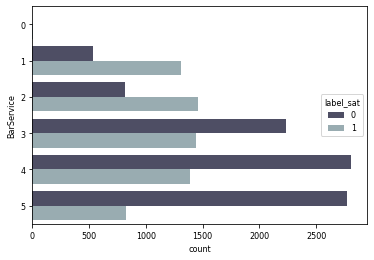

In [88]:
sns.countplot(y = 'BarService', hue = 'label_sat', data = unscaled_data, palette='bone')

<h2>Join Clusters</h2>

In [89]:
cluster00 = unscaled_data[unscaled_data.final_label=='00']
cluster01 = unscaled_data[unscaled_data.final_label=='01']
cluster02 = unscaled_data[unscaled_data.final_label=='02']
cluster03 = unscaled_data[unscaled_data.final_label=='03']
cluster10 = unscaled_data[unscaled_data.final_label=='10']
cluster11 = unscaled_data[unscaled_data.final_label=='11']
cluster12 = unscaled_data[unscaled_data.final_label=='12']
cluster13 = unscaled_data[unscaled_data.final_label=='13']



/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


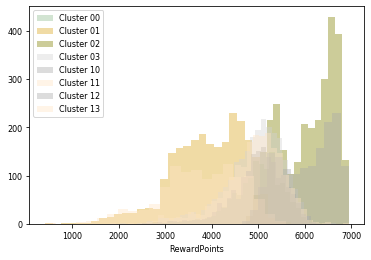

In [90]:
sns.distplot(cluster00['RewardPoints'],color='darkseagreen',label='Cluster 00', kde = False)
sns.distplot(cluster01['RewardPoints'],color='goldenrod',label='Cluster 01', kde = False)
sns.distplot(cluster02['RewardPoints'],color='olive',label='Cluster 02', kde = False)
sns.distplot(cluster03['RewardPoints'],color='lightgrey',label='Cluster 03', kde = False)
sns.distplot(cluster10['RewardPoints'],color='darkgrey',label='Cluster 10', kde = False)
sns.distplot(cluster11['RewardPoints'],color='bisque',label='Cluster 11', kde = False)
sns.distplot(cluster12['RewardPoints'],color='darkgrey',label='Cluster 12', kde = False)
sns.distplot(cluster13['RewardPoints'],color='bisque',label='Cluster 13', kde = False)
plt.legend()

/Users/leonurny/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/leonurny/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/leonurny/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in

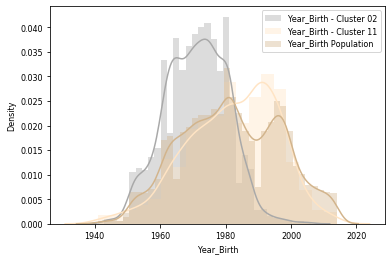

In [91]:
sns.distplot(cluster02['Year_Birth'], color = "darkgrey", label = "Year_Birth - Cluster 02")
sns.distplot(cluster11['Year_Birth'], color = "bisque", label = "Year_Birth - Cluster 11")
sns.distplot(unscaled_data['Year_Birth'], color = "tan", label = "Year_Birth Population")
plt.legend()

In [92]:
df_customer = unscaled_data.copy(deep=True)
df_customer['label'] = unscaled_data['label_cust']

descr = df_customer.reset_index(drop=True)
descr = descr.groupby(['label'])[['Churn', 'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType']].describe().T
descr

label                         0            1            2            3
Churn        count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.784681     0.222775     0.244789     0.636858
             std       0.411111     0.416166     0.430010     0.480960
             min       0.000000     0.000000     0.000000     0.000000
             25%       1.000000     0.000000     0.000000     0.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     0.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Male         count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.422419     0.526810     0.374501     0.616255
             std       0.494026     0.499350     0.484047     0.486352
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     0.000000
             50%       0.000000     1.000000     0.000000     1.000000
             75%       1.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Longevity    count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.072650     0.988391     0.998004     0.999547
             std       0.259603     0.107131     0.044632     0.021277
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     1.000000     1.000000     1.000000
             50%       0.000000     1.000000     1.000000     1.000000
             75%       0.000000     1.000000     1.000000     1.000000
             max       1.000000     1.000000     1.000000     1.000000
Year_Birth   count  3042.000000  3618.000000  4510.000000  4417.000000
             mean   1991.057199  1980.587617  1971.061197  1987.041884
             std      10.885975    12.522832    10.242406    16.720267
             min    1941.000000  1941.000000  1941.000000  1949.000000
             25%    1984.000000  1971.000000  1964.000000  1975.000000
             50%    1994.000000  1980.000000  1971.000000  1988.000000
             75%    1998.000000  1991.000000  1978.000000  2001.000000
             max    2014.000000  2014.000000  2013.000000  2014.000000
TypeTravel   count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.993754     0.997789     0.755432     0.161648
             std       0.078797     0.046978     0.429878     0.368169
             min       0.000000     0.000000     0.000000     0.000000
             25%       1.000000     1.000000     1.000000     0.000000
             50%       1.000000     1.000000     1.000000     0.000000
             75%       1.000000     1.000000     1.000000     0.000000
             max       1.000000     1.000000     1.000000     1.000000
RewardPoints count  3042.000000  3618.000000  4510.000000  4417.000000
             mean   5001.059172  3869.464898  6070.908426  4912.667195
             std     554.655236   810.158429   577.445515   642.557383
             min    2494.000000   409.000000  4651.000000   530.000000
             25%    4713.000000  3338.000000  5524.000000  4577.000000
             50%    5054.500000  3940.500000  6177.000000  5010.000000
             75%    5363.000000  4510.000000  6578.750000  5357.000000
             max    6380.000000  5701.000000  6950.000000  6949.000000
RoomType     count  3042.000000  3618.000000  4510.000000  4417.000000
             mean      0.664037     0.060807     0.428381     1.154856
             std       0.544213     0.239009     0.574147     0.440807
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     0.000000     0.000000     1.000000
             50%       1.000000     0.000000     0.000000     1.000000
             75%       1.000000     0.000000     1.000000     1.000000
             max       2

In [93]:
df_satisfaction = unscaled_data.copy(deep=True)
df_satisfaction['label'] = unscaled_data['label_sat']

descr = df_satisfaction.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  9157.000000  6430.000000
           mean      3.089003     2.489269
           std       1.403222     1.288327
           min       0.000000     0.000000
           25%       2.000000     2.000000
...                       ...          ...
BarService min       1.000000     0.000000
           25%       3.000000     2.000000
           50%       4.000000     3.000000
           75%       5.000000     4.000000
           max       5.000000     5.000000

[112 rows x 2 columns]

In [94]:
df_final = unscaled_data.copy(deep=True)
df_final['label'] = unscaled_data['final_label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Churn', 'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                      00           01           02           03  \
Churn      count  1342.000000  2442.000000  2946.000000  2427.000000   
           mean      0.643070     0.048321     0.075356     0.536465   
           std       0.479272     0.214488     0.264010     0.498771   
           min       0.000000     0.000000     0.000000     0.000000   
           25%       0.000000     0.000000     0.000000     0.000000   
...                       ...          ...          ...          ...   
BarService min       1.000000     1.000000     1.000000     1.000000   
           25%       2.000000     3.000000     3.000000     3.000000   
           50%       4.000000     4.000000     4.000000     4.000000   
           75%       4.000000     5.000000     5.000000     5.000000   
           max       5.000000     5.000000     5.000000     5.000000   

label                      10           11           12           13  
Churn      count  1700.000000  1176.000000  1564.000000  1990.000000  
           mean      0.896471     0.585034     0.563939     0.759296  
           std       0.304739     0.492926     0.496054     0.427618  
           min       0.000000     0.000000     0.000000     0.000000  
           25%       1.000000     0.000000     0.000000     1.000000  
...                       ...          ...          ...          ...  
BarService min       1.000000     0.000000     1.000000     0.000000  
           25%       2.000000     2.000000     2.000000     2.000000  
           50%       3.000000     3.000000     3.000000     3.000000  
           75%       4.000000     4.000000     4.000000     4.000000  
           max       5.000000     5.000000     5.000000     5.000000  

[168 rows x 8 columns]

<h3>Year Birth Plot<h3>
    

In [95]:
unscaled_data.head()

Cust_ID  Churn  Male  Longevity  Year_Birth  TypeTravel  RoomType  \
0        1      1     0          1        1974           1         0   
1        2      0     1          1        1965           1         0   
2        3      1     1          1        1973           1         0   
3        4      0     0          1        1993           0         1   
4        5      0     1          1        1989           1         0   

   RewardPoints  Comfort  ReceptionSchedule  ...  OnlineBooking  PriceQuality  \
0          4907        3                  4  ...              3             3   
1          6724        1                  1  ...              5             5   
2          4365        3                  3  ...              3             3   
3          3849        1                  1  ...              4             4   
4          5376        2                  2  ...              5             5   

   RoomSpace  CheckOut  Checkin  Cleanliness  BarService  label_sat  \
0          3         3        4            3           4          0   
1          5         5        1            5           2          0   
2          2         3        2            3           1          1   
3          4         4        4            4           3          0   
4          3         4        1            3           5          0   

   label_cust  final_label  
0           1           01  
1           2           02  
2           1           11  
3           3           03  
4           2           02  

[5 rows x 25 columns]

In [96]:
df_plot = unscaled_data[['Year_Birth','Male','final_label', 'Churn']]
df_plot = df_plot.groupby('final_label', as_index=False)[['Year_Birth', 'Male','Churn']].mean()
df_plot['Year_Birth'] = 2022 - df_plot['Year_Birth']
df_plot.rename(columns = {'Year_Birth':'Age'}, inplace = True)

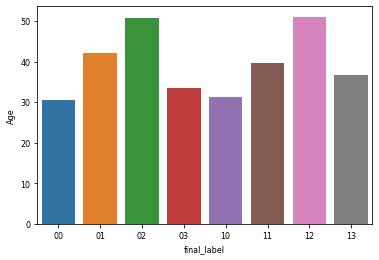

In [97]:
ax = sns.barplot(x="final_label", y="Age",  data=df_plot) 

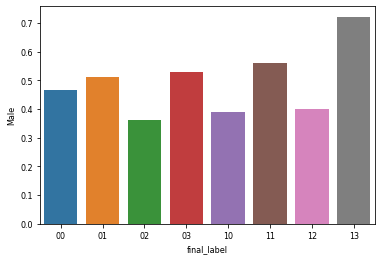

In [98]:
ax = sns.barplot(x="final_label", y="Male",  data=df_plot)

<h4> Clusters Evaluation for satisfaction perspective</h4>

In [99]:
def silhouette(X, algorithm):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    silhouette_scores =[]
    
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    return silhouette_scores

In [100]:
X = data_satisfaction[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.20813093842937452
For n_clusters = 3 The average silhouette_score is : 0.157665888163547
For n_clusters = 4 The average silhouette_score is : 0.15302595927122245
For n_clusters = 5 The average silhouette_score is : 0.15656005670063777
For n_clusters = 6 The average silhouette_score is : 0.15617298233382476
For n_clusters = 7 The average silhouette_score is : 0.13585749380272674
For n_clusters = 8 The average silhouette_score is : 0.13167894546092732


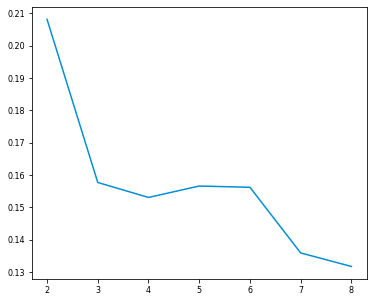

In [101]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 9), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)

In [102]:
hc_silhouette = silhouette(X, AgglomerativeClustering)

For n_clusters = 2 The average silhouette_score is : 0.18312684546971653
For n_clusters = 3 The average silhouette_score is : 0.16518114987466573
For n_clusters = 4 The average silhouette_score is : 0.0968724924306049
For n_clusters = 5 The average silhouette_score is : 0.09599667955993277
For n_clusters = 6 The average silhouette_score is : 0.09618655849499025
For n_clusters = 7 The average silhouette_score is : 0.0929330723716751
For n_clusters = 8 The average silhouette_score is : 0.08846765303927663


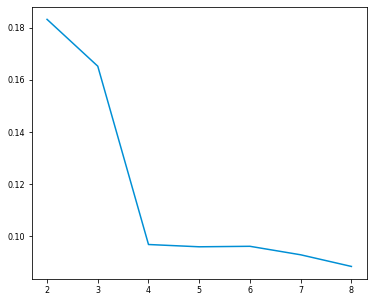

In [103]:
draw_silhouette(hc_silhouette)

<h4>Clusters Evaluation for customer perspective</h4>

In [104]:
X = data_customer[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.1934675628174082
For n_clusters = 3 The average silhouette_score is : 0.21809466328485294
For n_clusters = 4 The average silhouette_score is : 0.23733546634153727
For n_clusters = 5 The average silhouette_score is : 0.23510322608717457
For n_clusters = 6 The average silhouette_score is : 0.2512152122390211
For n_clusters = 7 The average silhouette_score is : 0.2374219048590903
For n_clusters = 8 The average silhouette_score is : 0.24176903576889971


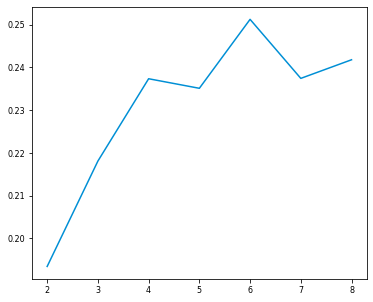

In [105]:
def draw_silhouette(silhouette_scores):
    plt.figure(figsize=(6, 5))
    plt.plot(range(2, 9), silhouette_scores,c="#008fd5",label="Silhouette Coefficient")

draw_silhouette(k_means_silhouette)

<h3>Cluster Evaluation for merged perspective<h3>

In [106]:
X = unscaled_data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn','Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].values

k_means_silhouette = silhouette(X, KMeans)

For n_clusters = 2 The average silhouette_score is : 0.5369755502037812
For n_clusters = 3 The average silhouette_score is : 0.5720551662927331
For n_clusters = 4 The average silhouette_score is : 0.5599331945917393
For n_clusters = 5 The average silhouette_score is : 0.5360509504878839
For n_clusters = 6 The average silhouette_score is : 0.5447556373802132
For n_clusters = 7 The average silhouette_score is : 0.5413222628176616
For n_clusters = 8 The average silhouette_score is : 0.5439459659720147
